# Importing libraries

In [23]:
from oceanicospy.observations import AQUAlogger,RBR

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pathlib import Path
import os

plt.rcParamsDefault['figure.dpi'] = 300

In [10]:
measurement_paths = ['../data/May2025/AQ/AQ1_inreefball_SB/',
                     '../data/May2025/AQ/AQ2_outreefball_SB/',
                     '../data/May2025/RBR/RBR1_SoundBay_ReefBall_Out_serial95/234695_20250520_1211/',
                     '../data/May2025/RBR/RBR2_SoundBay_OutBarrier_serial96/234696_20250520_1727/'] 

sampling_AQ1=dict(anchoring_depth=1,sensor_height=0.2,sampling_freq=1,burst_length_s=2048,temperature=False,
                            start_time=datetime(2025,5,9,10,0,0),end_time=datetime(2025,5,19,18,0,0)-timedelta(seconds=1))
sampling_AQ2=dict(anchoring_depth=1,sensor_height=0.2,sampling_freq=1,burst_length_s=2048,temperature=False,
                            start_time=datetime(2025,5,9,10,0,0),end_time=datetime(2025,5,19,18,0,0)-timedelta(seconds=1))
sampling_RBR1=dict(anchoring_depth=1,sensor_height=0.2,sampling_freq=2,burst_length_s=7200,
                            start_time=datetime(2025,5,9,10,0,0),end_time=datetime(2025,5,19,18,0,0)-timedelta(seconds=0.5))
sampling_RBR2=dict(anchoring_depth=1,sensor_height=0.2,sampling_freq=2,burst_length_s=7200,
                            start_time=datetime(2025,5,9,10,0,0),end_time=datetime(2025,5,19,18,0,0)-timedelta(seconds=0.5))

sampling_data = [sampling_AQ1, sampling_AQ2,sampling_RBR1,sampling_RBR2]
metadata_list=['AQ1_May_2025_SB','AQ2_May_2025_SB','RBR1_May_2025_SB','RBR2_May_2025_SB']
dict_raw_measurements = dict()
dict_clean_measurements = dict()

dict_spectra = dict()
dict_freq = dict()
dict_IMFs = dict()

for idx,measurement_path in enumerate(measurement_paths[:-1]):
    print(measurement_path)
    if 'AQ' in measurement_path:
        AQ = AQUAlogger(measurement_path, sampling_data[idx])
        AQ_clean_data = AQ.get_clean_records()
        dict_clean_measurements[metadata_list[idx]] = AQ_clean_data
    if 'RBR' in measurement_path:
        RBR_obj = RBR(measurement_path, sampling_data[idx])
        RBR_clean_data = RBR_obj.get_clean_records()
        dict_clean_measurements[metadata_list[idx]] = RBR_clean_data

../data/May2025/AQ/AQ1_inreefball_SB/
../data/May2025/AQ/AQ2_outreefball_SB/
../data/May2025/RBR/RBR1_SoundBay_ReefBall_Out_serial95/234695_20250520_1211/


In [30]:
dict_clean_measurements['RBR1_May_2025_SB'][::2]

,pressure[bar],depth[m],burstId
date,,,
2025-05-09 10:00:00,1.241829,2.267149,1
2025-05-09 10:00:01,1.235314,2.202530,1
2025-05-09 10:00:02,1.234466,2.194119,1
2025-05-09 10:00:03,1.228327,2.133230,1
2025-05-09 10:00:04,1.226847,2.118547,1
...,...,...,...
2025-05-19 17:59:55,1.230401,2.153801,248
2025-05-19 17:59:56,1.221551,2.066021,248
2025-05-19 17:59:57,1.225061,2.100837,248


In [31]:
dict_clean_measurements['AQ2_May_2025_SB']

,pressure[bar],depth[m],depth_aux[m],burstId
date,,,,
2025-05-09 10:00:00,1.229707,2.953382,2.148376,1
2025-05-09 10:00:01,1.225594,2.906098,2.107553,1
2025-05-09 10:00:02,1.224634,2.895049,2.098025,1
2025-05-09 10:00:03,1.218876,2.828627,2.040876,1
2025-05-09 10:00:04,1.217368,2.811194,2.025909,1
...,...,...,...,...
2025-05-19 16:34:03,1.227650,2.929754,2.127959,124
2025-05-19 16:34:04,1.226828,2.920295,2.119801,124
2025-05-19 16:34:05,1.221069,2.853958,2.062642,124


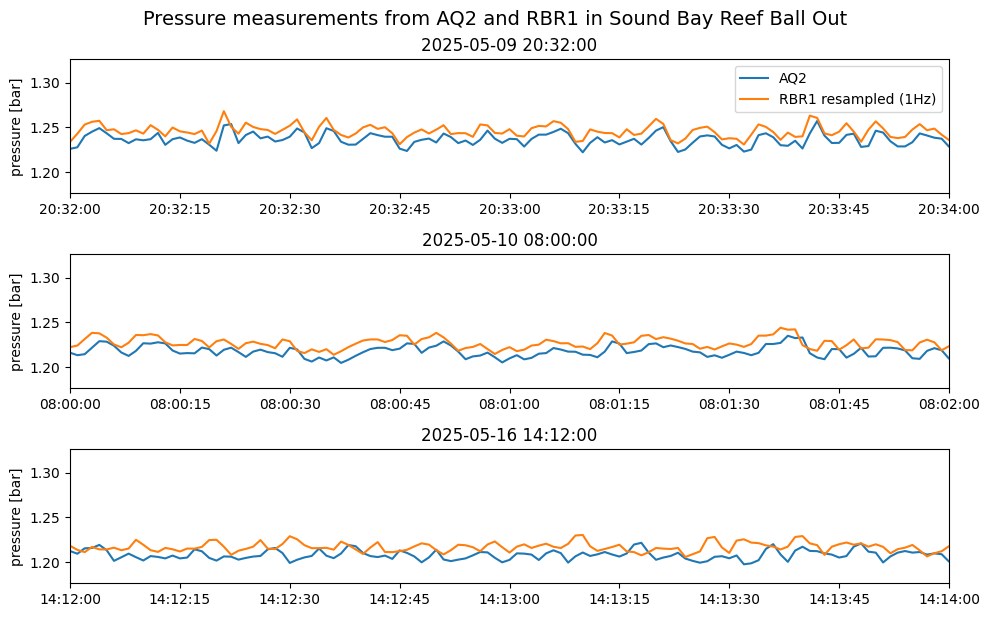

In [49]:
fig,[ax1,ax2,ax3]=plt.subplots(3,1,figsize=(10,6))
ax1.plot(dict_clean_measurements['AQ2_May_2025_SB']['pressure[bar]'],label='AQ2')
ax1.plot(dict_clean_measurements['RBR1_May_2025_SB']['pressure[bar]'][::2],label='RBR1 resampled (1Hz)')
ax1.set(xlim=[datetime(2025,5,9,20,32,0),datetime(2025,5,9,20,34,0)],ylabel='pressure [bar]',
        title=datetime(2025,5,9,20,32,0).strftime('%Y-%m-%d %H:%M:%S'))
ax1.legend()

ax2.plot(dict_clean_measurements['AQ2_May_2025_SB']['pressure[bar]'],label='AQ2')
ax2.plot(dict_clean_measurements['RBR1_May_2025_SB']['pressure[bar]'][::2],label='RBR1')
ax2.set(xlim=[datetime(2025,5,10,8,0,0),datetime(2025,5,10,8,2,0)],ylabel='pressure [bar]',
        title=datetime(2025,5,10,8,0,0).strftime('%Y-%m-%d %H:%M:%S'))

ax3.plot(dict_clean_measurements['AQ2_May_2025_SB']['pressure[bar]'],label='AQ2')
ax3.plot(dict_clean_measurements['RBR1_May_2025_SB']['pressure[bar]'][::2],label='RBR1')
ax3.set(xlim=[datetime(2025,5,16,14,12,0),datetime(2025,5,16,14,14,0)],ylabel='pressure [bar]',
        title=datetime(2025,5,16,14,12,0).strftime('%Y-%m-%d %H:%M:%S'))
plt.tight_layout()
plt.suptitle('Pressure measurements from AQ2 and RBR1 in Sound Bay Reef Ball Out', fontsize=14,y=1.02)
plt.show()

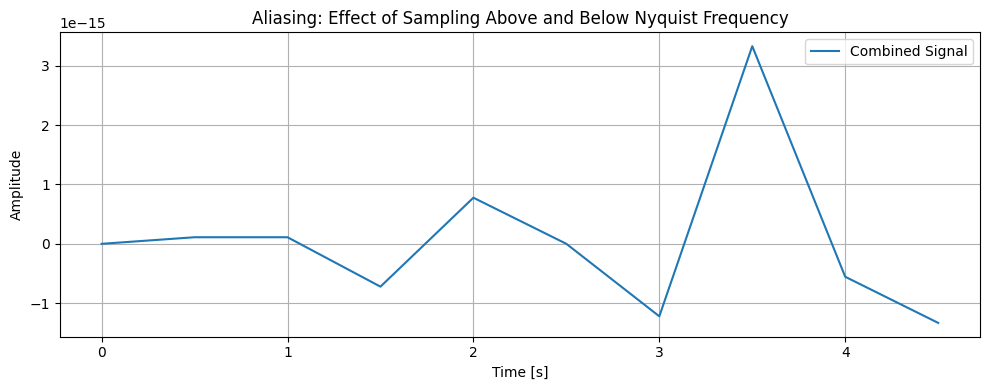

In [53]:
import numpy as np

# Simulate a signal with two frequencies: one below and one above the Nyquist frequency
fs = 2  # Sampling frequency in Hz
t = np.arange(0, 5, 1/fs)  # 5 seconds of data

f1 = 0.7  # Hz, below Nyquist (fs/2 = 1 Hz)
f2 = 1.3  # Hz, above Nyquist

signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Combined Signal')
plt.title('Aliasing: Effect of Sampling Above and Below Nyquist Frequency')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../docs/images/nyquist_example.png', dpi=300)
plt.show()

# Explanation: The 1.3 Hz component (above Nyquist) will appear as a lower frequency (aliasing).